# Importing dependencies

In [41]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/crime-cast-forecasting-crime-categories/sample.csv
/kaggle/input/crime-cast-forecasting-crime-categories/train.csv
/kaggle/input/crime-cast-forecasting-crime-categories/test.csv


In [42]:
# Import necessary libraries for data manipulation and analysis
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For plotting graphs and visualizations



# Import necessary libraries for machine learning
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MultiLabelBinarizer
import pandas as pd
from xgboost import XGBClassifier
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from collections import Counter



from scipy.stats import uniform, randint



import seaborn as sns  
sns.set(style="white", palette="muted")
# Import necessary libraries for handling warnings
import warnings  # For controlling warning messages
warnings.filterwarnings('ignore')  # Ignore warning messages

# Import specific functions from libraries
from math import sqrt  # For square root calculation
from datetime import datetime  # For date and time manipulation


In [43]:
train = pd.read_csv("/kaggle/input/crime-cast-forecasting-crime-categories/train.csv")
test = pd.read_csv("/kaggle/input/crime-cast-forecasting-crime-categories/test.csv")

In [44]:
x_train = train.drop('Crime_Category', axis = 1)
y_train = train['Crime_Category']

x_test = test

# EDA 

## Summary Statistics


In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               20000 non-null  object 
 1   Cross_Street           3448 non-null   object 
 2   Latitude               20000 non-null  float64
 3   Longitude              20000 non-null  float64
 4   Date_Reported          20000 non-null  object 
 5   Date_Occurred          20000 non-null  object 
 6   Time_Occurred          20000 non-null  float64
 7   Area_ID                20000 non-null  float64
 8   Area_Name              20000 non-null  object 
 9   Reporting_District_no  20000 non-null  float64
 10  Part 1-2               20000 non-null  float64
 11  Modus_Operandi         17259 non-null  object 
 12  Victim_Age             20000 non-null  float64
 13  Victim_Sex             17376 non-null  object 
 14  Victim_Descent         17376 non-null  object 
 15  Pr

In [46]:
# Summary statistics
train.describe()

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Weapon_Used_Code
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,7335.000000
mean,33.940704,-117.893072,1352.380350,10.834250,1129.599200,1.418150,30.135000,297.176950,366.405044
std,2.126810,7.377726,646.100291,6.033166,603.330519,0.493267,21.863645,212.007298,120.485687
min,0.000000,-118.663400,1.000000,1.000000,101.000000,1.000000,-2.000000,101.000000,101.000000
25%,34.009200,-118.429700,930.000000,6.000000,632.000000,1.000000,12.000000,101.000000,312.000000
50%,34.058700,-118.323000,1430.000000,11.000000,1162.000000,1.000000,31.000000,203.000000,400.000000
75%,34.165025,-118.274400,1900.000000,16.000000,1622.000000,2.000000,46.000000,501.000000,400.000000
max,34.328100,0.000000,2359.000000,21.000000,2197.000000,2.000000,99.000000,969.000000,515.000000


## Univariate Analysis



Text(0.5, 1.0, 'Distribution of Crime Categories')

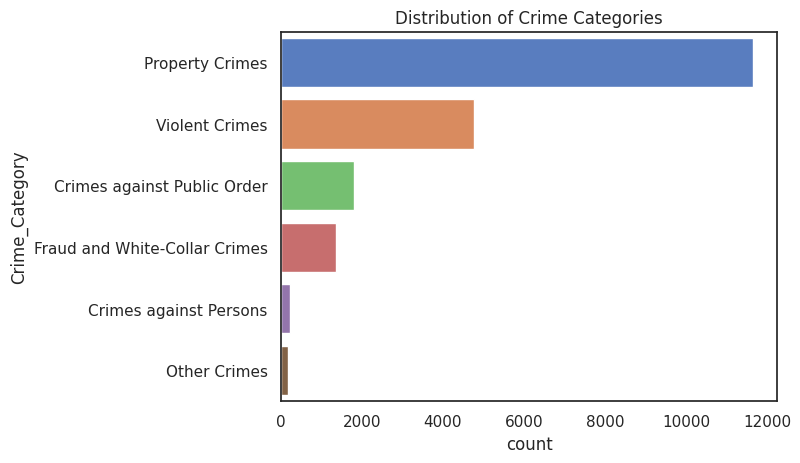

In [47]:
#Distribution of Crime Categories
sns.countplot(y='Crime_Category', data=train, order = train['Crime_Category'].value_counts().index)
plt.title('Distribution of Crime Categories')

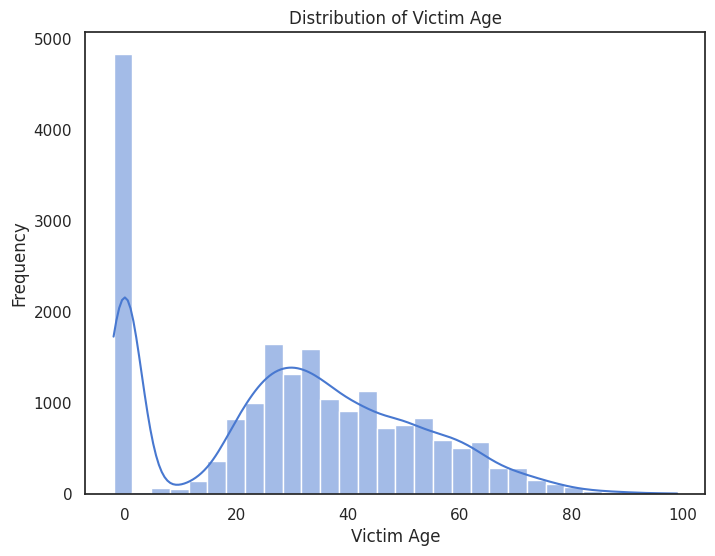

In [48]:
#Victim Age Distribution
data_cleaned = train.dropna(subset=['Victim_Age'])

plt.figure(figsize=(8, 6))
sns.histplot(data_cleaned['Victim_Age'], kde=True, bins=30)
plt.title('Distribution of Victim Age')
plt.xlabel('Victim Age')
plt.ylabel('Frequency')
plt.show()


**Victim_Age** - There are just too many values with 0, so can't use Victim Age, will make the assumption that the victim's who were absent had their age set to 0. Will be creating a "Victim_Present" feature. 

**General Observation** - Majority of the victims lie on the 20-40 bracket

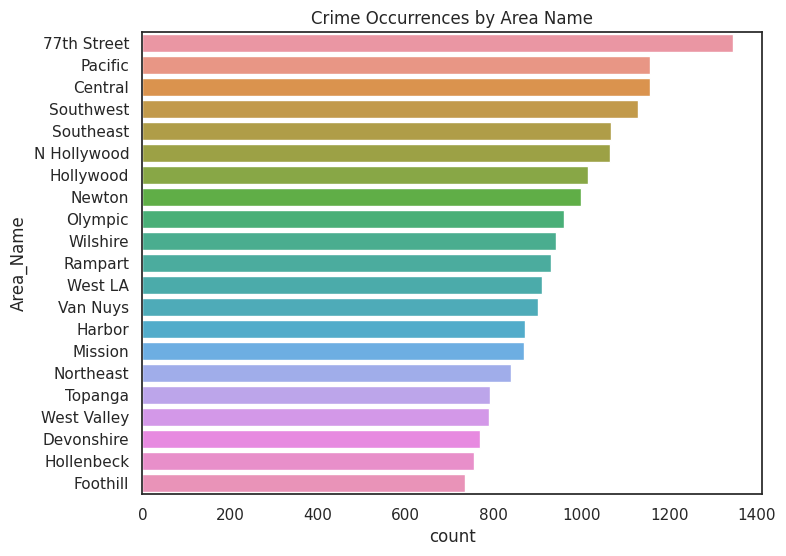

In [49]:
plt.figure(figsize=(8, 6))
sns.countplot(y='Area_Name', data=train, order = train['Area_Name'].value_counts().index)
plt.title('Crime Occurrences by Area Name')
plt.show()

The highest number of crimes took place in **77th street**, this feature looks useful will keep the **Area_id** column.

## Missing Values


In [50]:
#Finding out and devising a strategy to handle missing values 
train = train.replace(0, pd.NA)

missing_values_percentage = train.isnull().mean() * 100

missing_values_percentage.sort_values(ascending=False)


Cross_Street             82.760
Weapon_Description       63.325
Weapon_Used_Code         63.325
Victim_Age               24.140
Modus_Operandi           13.705
Victim_Sex               13.120
Victim_Descent           13.120
Latitude                  0.390
Longitude                 0.390
Premise_Description       0.025
Status_Description        0.000
Status                    0.000
Premise_Code              0.000
Location                  0.000
Part 1-2                  0.000
Reporting_District_no     0.000
Area_Name                 0.000
Area_ID                   0.000
Time_Occurred             0.000
Date_Occurred             0.000
Date_Reported             0.000
Crime_Category            0.000
dtype: float64

**Observations and potential actions**
* **Cross_Street:** Even though this column has a high percentage of missing values,imputing this is a challenge so to retain useful information, a new binary variable named is_crossstreet is created. This variable indicates whether the Cross_Street data is present (1) or not (0).

* **Weapon_Description & Weapon_Used_Code:** These columns have been dropped, as imputing or creating a new feature was challenging 

* Other columns have been imputed with some method.

## Bivariate Analysis


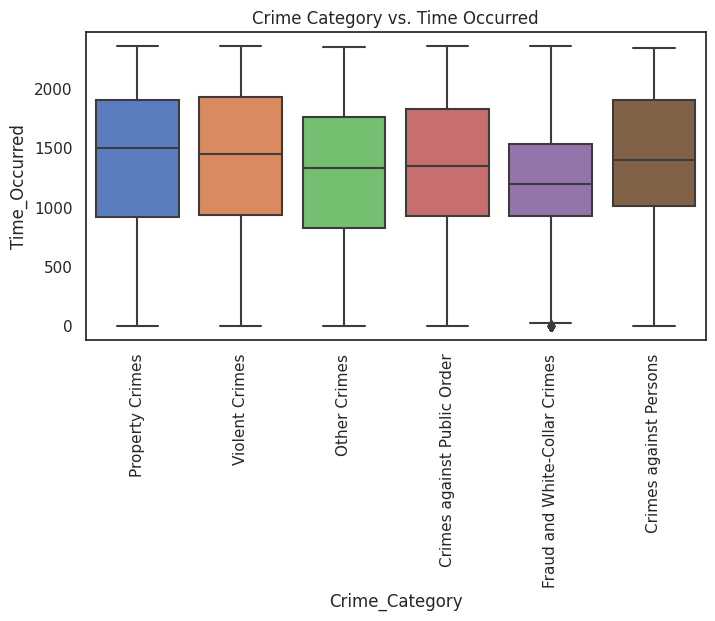

In [51]:
# Crime Category vs. Time Occurred
plt.figure(figsize=(8, 4))
sns.boxplot(x='Crime_Category', y='Time_Occurred', data=train)
plt.xticks(rotation=90)
plt.title('Crime Category vs. Time Occurred')
plt.show()


* Most crimes across categories occur between 9 AM - 6 PM, peaking around noon to 3 PM.
* Property and Violent Crimes show wider time distributions whereas White-Collar are more time-concentrated.

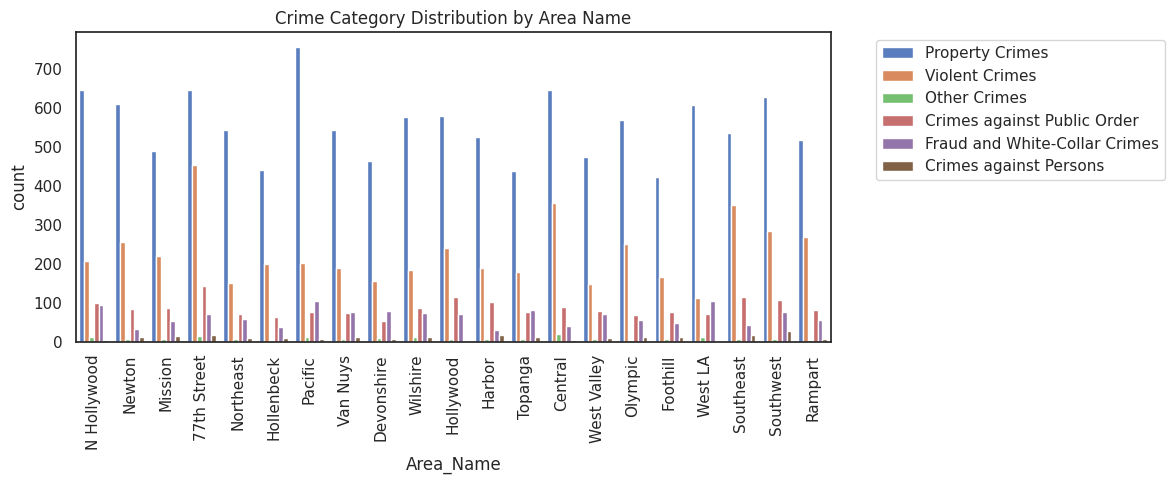

In [52]:
#Crime Category Distribution by Area Name
plt.figure(figsize=(12, 5))
sns.countplot(x='Area_Name', hue='Crime_Category', data=train)
plt.xticks(rotation=90)
plt.title('Crime Category Distribution by Area Name')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

* Property crimes dominate across all areas, with Pacific and Central showing highest overall crime counts.
* Violent crimes are second most common, with 77th Street, Central and Southwest areas having notably high rates.

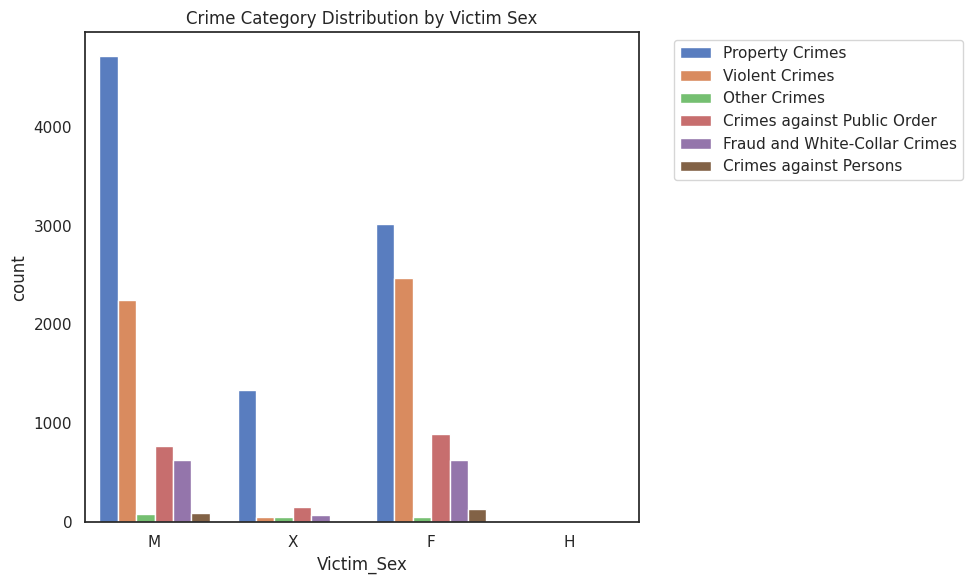

In [53]:
# Crime Category Distribution by Victim Sex
plt.figure(figsize=(10, 6))
sns.countplot(x='Victim_Sex', hue='Crime_Category', data=train)
plt.title('Crime Category Distribution by Victim Sex')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

* Males show more property crimes
* Females show a similar pattern but more victimization in violent crimes

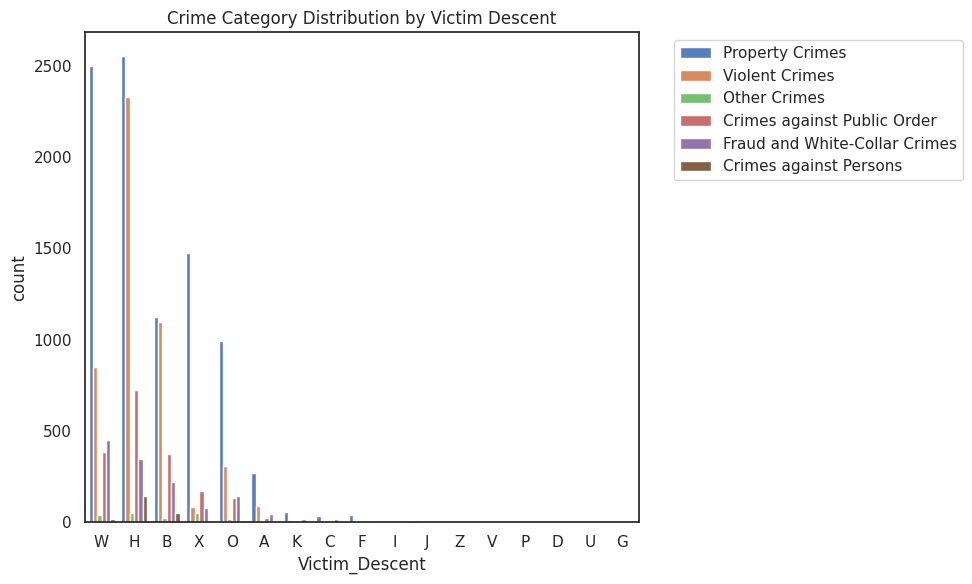

In [54]:
# Crime Category Distribution by Victim Descent
plt.figure(figsize=(10, 6))
sns.countplot(x='Victim_Descent', hue='Crime_Category', data=train)
plt.title('Crime Category Distribution by Victim Descent')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

* H are victimized the most in violent crimes
* For X(Unknown) and W the ratio of property crimes is significntly higher than any other crime category

## Correlation Matrix

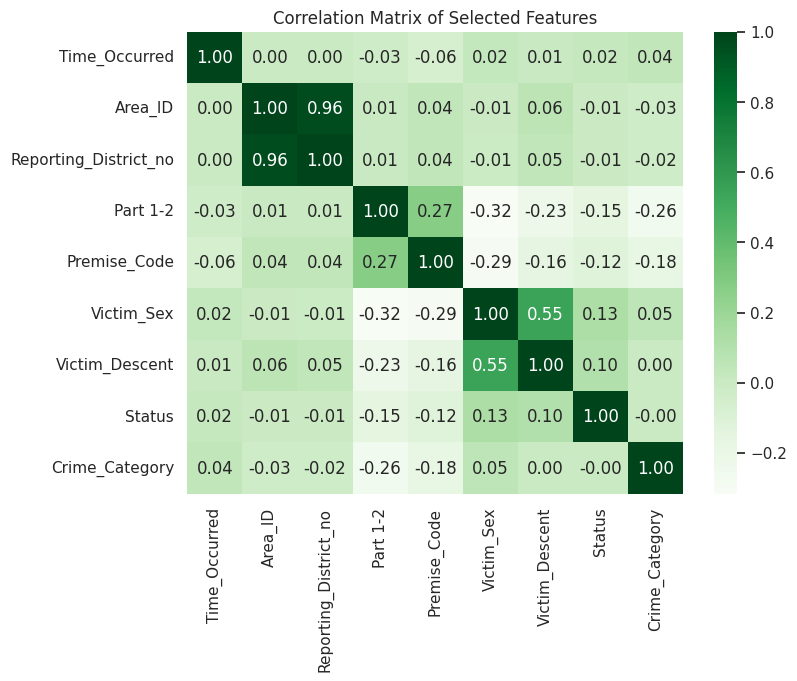

In [55]:
cat_columns = ['Area_ID', 'Reporting_District_no', 'Part 1-2', 'Premise_Code', 'Victim_Sex', 'Victim_Descent', 'Status', 'Crime_Category']
num_cols = ['Time_Occurred']

df_encoded = train.copy()

label_encoder = LabelEncoder()
for col in cat_columns:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col].astype(str))

correlation_matrix = df_encoded[num_cols + cat_columns].corr()


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt='.2f')
plt.title('Correlation Matrix of Selected Features')
plt.show()


**Summary of correlation matrix:**

* **Crime_Category** has relatively weak correlations with most features, with the strongest being a moderate negative correlation (-0.26) with **Part 1-2**.
* There's a very strong correlation (0.96) between **Area_ID** and **Reporting_District_no**, indicating potential redundancy in these features and One of them can be dropped.
* Some moderate correlations exist between other features - **Victim_Sex** and **Victim_Descent** at 0.55

# Preprocessing and Feature Engineering


## Numerical Features Preprocessing 


The only 2 numerical feature kept for modeling are **Latitude** and **Longitude** - handled missing latitude and longitude values by imputing them with the mean, ensuring that the dataset remained complete and consistent for analysis. Since the number of missing values was so less, went with mean.

In [56]:


#Handling latitude and longitude missing values. 

imputer=SimpleImputer(missing_values=0,strategy='mean')

x_train['Latitude']=imputer.fit_transform(x_train[['Latitude']])
x_test['Latitude']=imputer.transform(x_test[['Latitude']])
x_train['Longitude']=imputer.fit_transform(x_train[['Longitude']])
x_test['Longitude']=imputer.transform(x_test[['Longitude']])




## Feature Engineering - Creating new features

**1. Days_Lapsed** - This feature captures the time difference between when a crime occurred and when it was reported. This could be significant as it might indicate the severity or nature of the crime, or patterns in reporting behavior. Calculated by subtracting the 'Date_Occurred' from the 'Date_Reported' and extracting the number of days.


**2. Victim_Present** This binary feature indicates whether a victim was present during the crime. The presence or absence of a victim could be a crucial factor in determining the crime category.

**3. Is_CrossStreet** This feature indicates whether a cross street was recorded for the crime location. The presence of this information might correlate with certain types of crimes or areas.


In [57]:
# Calculate the number of days lapsed between Date_Reported and Date_Occurred for X_train
x_train['Days_Lapsed'] = (pd.to_datetime(x_train['Date_Reported']) - pd.to_datetime(x_train['Date_Occurred'])).dt.days

# Apply the same calculation to X_test
x_test['Days_Lapsed'] = (pd.to_datetime(x_test['Date_Reported']) - pd.to_datetime(x_test['Date_Occurred'])).dt.days


In [58]:
def mark_victim_present(age):
    return 0 if age == 0 else 1

# For train data
x_train['Victim_Present'] = x_train['Victim_Age'].apply(mark_victim_present)

# For test data
x_test['Victim_Present'] = x_test['Victim_Age'].apply(mark_victim_present)


In [59]:
def is_cross_street(x):
    return 1 if pd.notnull(x) and x != '' else 0

# For train data
x_train['Is_CrossStreet'] = x_train['Cross_Street'].apply(is_cross_street)
# For test data
x_test['Is_CrossStreet'] = x_test['Cross_Street'].apply(is_cross_street)

## Working with "Modus Operandi"


1. **Imputation**: Fill missing values with most frequent Modus Operandi.
2. **Splitting**: Convert each Modus Operandi string to a list of elements.
3. **Multi-Label Binarization**: Transform lists into binary columns.

In [60]:

def split_modus_operandi(x):
    return str(x).split(" ") if x else []

# Initializing the imputer
imputer = SimpleImputer(strategy='most_frequent')

x_train["Modus_Operandi"] = imputer.fit_transform(x_train[["Modus_Operandi"]]).flatten()
x_train["Modus_Operandi"] = x_train["Modus_Operandi"].apply(split_modus_operandi)

x_test["Modus_Operandi"] = imputer.transform(x_test[["Modus_Operandi"]]).flatten()
x_test["Modus_Operandi"] = x_test["Modus_Operandi"].apply(split_modus_operandi)

In [61]:


if 'Modus_Operandi' in x_train.columns and 'Modus_Operandi' in x_test.columns:
    mlb = MultiLabelBinarizer()

    modus_train = mlb.fit_transform(x_train['Modus_Operandi'])
    modus_test = mlb.transform(x_test['Modus_Operandi'])

    modus_train_df = pd.DataFrame(modus_train, columns=mlb.classes_)
    modus_test_df = pd.DataFrame(modus_test, columns=mlb.classes_)

    # Concatenating the dataset
    x_train = pd.concat([x_train.reset_index(drop=True), modus_train_df], axis=1)
    x_test = pd.concat([x_test.reset_index(drop=True), modus_test_df], axis=1)

    # Dropping the original Modus_Operandi
    x_train.drop(columns=['Modus_Operandi'], inplace=True)
    x_test.drop(columns=['Modus_Operandi'], inplace=True)
    
    print("Modus_Operandi feature has been binarized and added to the dataset.")
else:
    print("Modus_Operandi column is missing from the dataset.")


Modus_Operandi feature has been binarized and added to the dataset.


## Dropping redundant columns

In [62]:
x_train.drop(['Location','Date_Reported', 'Date_Occurred', 'Cross_Street', 'Area_Name', 'Premise_Description', 'Status_Description', 'Weapon_Description', 'Weapon_Used_Code','Time_Occurred','Victim_Age'], axis=1, inplace=True)
x_test.drop(['Location','Date_Reported', 'Date_Occurred', 'Cross_Street', 'Area_Name', 'Premise_Description', 'Status_Description', 'Weapon_Description', 'Weapon_Used_Code','Time_Occurred','Victim_Age'], axis=1, inplace=True)

## Pipeline for preprocessing categorical values




**Categorical Features:**
- Area_ID
- Reporting_District_no
- Part 1-2
- Premise_Code
- Victim_Sex
- Victim_Descent
- Status

**Categorical Transformation:**
1. Imputation: Fill missing values with most frequent
2. Encoding: One-Hot Encoding 

In [63]:

# Defining categorical features 
categorical_features = [
    'Area_ID', 'Reporting_District_no', 'Part 1-2', 'Premise_Code',
    'Victim_Sex', 'Victim_Descent', 'Status'
]

# Defining the preprocessing for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combining the transformations into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'  
)




# Models

In [64]:
# Splitting the data into training and validation sets
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

## Model 1 - Decision Tree Classifier

In [65]:
'''
#HyperParameter Tuning of DT 
dt_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

dt_param_dist = {
    'classifier__max_depth': randint(1, 20),
    'classifier__min_samples_split': randint(2, 20),
    'classifier__min_samples_leaf': randint(1, 20),
    'classifier__criterion': ['gini', 'entropy']
}

dt_search = RandomizedSearchCV(
    dt_pipeline,
    param_distributions=dt_param_dist,
    n_iter=50,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

dt_search.fit(x_train, y_train)

print("Decision Tree Best Parameters:", dt_search.best_params_)
print("Decision Tree Best CV Score:", dt_search.best_score_)

'''

'\n#HyperParameter Tuning of DT \ndt_pipeline = Pipeline([\n    (\'preprocessor\', preprocessor),\n    (\'classifier\', DecisionTreeClassifier(random_state=42))\n])\n\ndt_param_dist = {\n    \'classifier__max_depth\': randint(1, 20),\n    \'classifier__min_samples_split\': randint(2, 20),\n    \'classifier__min_samples_leaf\': randint(1, 20),\n    \'classifier__criterion\': [\'gini\', \'entropy\']\n}\n\ndt_search = RandomizedSearchCV(\n    dt_pipeline,\n    param_distributions=dt_param_dist,\n    n_iter=50,\n    cv=5,\n    scoring=\'accuracy\',\n    n_jobs=-1,\n    random_state=42,\n    verbose=1\n)\n\ndt_search.fit(x_train, y_train)\n\nprint("Decision Tree Best Parameters:", dt_search.best_params_)\nprint("Decision Tree Best CV Score:", dt_search.best_score_)\n\n'

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Decision Tree Best Parameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': 17, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 19}
Decision Tree Best CV Score: 0.915234375

In [66]:

best_dt_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(
        criterion='entropy',
        max_depth=17,
        min_samples_leaf=4,
        min_samples_split=19,
        random_state=42
    ))
])

best_dt_pipeline.fit(x_train, y_train)

y_pred = best_dt_pipeline.predict(x_val)

accuracy = accuracy_score(y_val, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.4f}")





Decision Tree Accuracy: 0.9163


In [67]:
y_pred_dt = best_dt_pipeline.predict(x_val)
print("Decision Tree Classification Report:")
print(classification_report(y_val, y_pred_dt))

Decision Tree Classification Report:
                               precision    recall  f1-score   support

       Crimes against Persons       0.42      0.34      0.38        32
  Crimes against Public Order       0.65      0.84      0.73       374
Fraud and White-Collar Crimes       0.89      0.83      0.86       267
                 Other Crimes       0.20      0.03      0.05        35
              Property Crimes       0.98      0.98      0.98      2303
               Violent Crimes       0.92      0.87      0.89       989

                     accuracy                           0.92      4000
                    macro avg       0.68      0.65      0.65      4000
                 weighted avg       0.92      0.92      0.91      4000



## Model 2 - Logistic Regression 

In [68]:
#Logistic Regression
log_reg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

log_reg_pipeline.fit(x_train, y_train)

y_pred_log = log_reg_pipeline.predict(x_val)

# Calculating accuracy
accuracy_log = accuracy_score(y_val, y_pred_log)
print("Logistic Regression Accuracy: {:.2f}%".format(accuracy_log * 100))



Logistic Regression Accuracy: 94.03%


In [69]:
y_pred_log = log_reg_pipeline.predict(x_val)
print("Logistic Regression Classification Report:")
print(classification_report(y_val, y_pred_log))

Logistic Regression Classification Report:
                               precision    recall  f1-score   support

       Crimes against Persons       0.54      0.41      0.46        32
  Crimes against Public Order       0.81      0.82      0.81       374
Fraud and White-Collar Crimes       0.95      0.92      0.93       267
                 Other Crimes       0.47      0.20      0.28        35
              Property Crimes       0.98      0.98      0.98      2303
               Violent Crimes       0.92      0.93      0.93       989

                     accuracy                           0.94      4000
                    macro avg       0.78      0.71      0.73      4000
                 weighted avg       0.94      0.94      0.94      4000



## Model 3 - Random Forest Classifier


In [70]:
'''
# Defining the initial pipeline
initial_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])
# Defining the parameter grid
param_grid = {
    'classifier__n_estimators': [100, 200, 300, 400, 500],
    'classifier__max_depth': [None, 10, 20, 30, 40, 50],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__bootstrap': [True, False]
}

# Defining RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=initial_pipeline,
    param_distributions=param_grid,
    n_iter=50,  
    cv=5, 
    scoring='accuracy', 
    random_state=42,
    n_jobs=-1 
)

# Fit the random search model
random_search.fit(x_train, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score: ", random_search.best_score_)
'''


'\n# Defining the initial pipeline\ninitial_pipeline = Pipeline([\n    (\'preprocessor\', preprocessor),\n    (\'classifier\', RandomForestClassifier(random_state=42))\n])\n# Defining the parameter grid\nparam_grid = {\n    \'classifier__n_estimators\': [100, 200, 300, 400, 500],\n    \'classifier__max_depth\': [None, 10, 20, 30, 40, 50],\n    \'classifier__min_samples_split\': [2, 5, 10],\n    \'classifier__min_samples_leaf\': [1, 2, 4],\n    \'classifier__bootstrap\': [True, False]\n}\n\n# Defining RandomizedSearchCV\nrandom_search = RandomizedSearchCV(\n    estimator=initial_pipeline,\n    param_distributions=param_grid,\n    n_iter=50,  \n    cv=5, \n    scoring=\'accuracy\', \n    random_state=42,\n    n_jobs=-1 \n)\n\n# Fit the random search model\nrandom_search.fit(x_train, y_train)\n\n# Print the best parameters and the best score\nprint("Best parameters found: ", random_search.best_params_)\nprint("Best cross-validation score: ", random_search.best_score_)\n'

**Best parameters found: ** {'classifier__n_estimators': 300, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 1, 'classifier__max_depth': None, 'classifier__bootstrap': False}
Best cross-validation score:  0.9410000000000001

In [71]:

# Defining the model pipeline with the best parameters
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=300,
        min_samples_split=2,
        min_samples_leaf=1,
        max_depth=None,
        bootstrap=False,
        random_state=42
    ))
])

model_pipeline.fit(x_train, y_train)

y_pred = model_pipeline.predict(x_val)

accuracy = accuracy_score(y_val, y_pred)
print("Model accuracy: {:.2f}%".format(accuracy * 100))

Model accuracy: 94.08%


In [72]:
y_pred_rf = model_pipeline.predict(x_val)
print("Random Forest Classification Report:")
print(classification_report(y_val, y_pred_rf))

Random Forest Classification Report:
                               precision    recall  f1-score   support

       Crimes against Persons       0.50      0.09      0.16        32
  Crimes against Public Order       0.84      0.77      0.81       374
Fraud and White-Collar Crimes       0.95      0.93      0.94       267
                 Other Crimes       0.67      0.06      0.11        35
              Property Crimes       0.98      0.98      0.98      2303
               Violent Crimes       0.89      0.96      0.93       989

                     accuracy                           0.94      4000
                    macro avg       0.80      0.63      0.65      4000
                 weighted avg       0.94      0.94      0.93      4000



## Summary 
### Models Tested:
1. Decision Tree
2. Logistic Regression
3. Random Forest

### Performance:
- Decision Tree: Baseline model, lowest accuracy (91.63%)
- Logistic Regression: Improved accuracy over Decision Tree (94.03%)
- Random Forest: Highest accuracy (94.10%)

### Selected Model: Random Forest
- Best parameters:
  - n_estimators: 300
  - min_samples_split: 2
  - min_samples_leaf: 1
  - max_depth: None
  - bootstrap: False


# Submission

In [73]:
#Predictin using Random Forest
y_pred_1 = model_pipeline.predict(x_test)

In [74]:
y_pred_1.shape

(5000,)

In [75]:

submission = pd.DataFrame({
    "ID": np.arange(1, 5001),
    "Crime_Category": y_pred_1,
})

submission.to_csv('submission.csv', index=False)